In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from itertools import combinations, product
import scipy.special
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
%matplotlib inline

In [2]:
project_dir = '/Users/ari/GraphLearn'
data_dir = f'{project_dir}/data'

In [3]:
from roi_loader import Loader
loader = Loader(project_dir)

from graphs import (
    modular,
    ring_lattice,
    graph_df,
    subjects,
    subjects_lattice,
    subjects_modular
)

In [15]:
results_temp = []
m_max = 0
for subject_id in subjects:
    for roi in [
        'loc-localized',
        'postcentral-lh',
#         'postcentral-rh'
    ]:
        for m in range(2, 16):
            try:
                x = np.load(f'{project_dir}/derived/dimensionality/sub-{subject_id}/sub-{subject_id}_{roi}_accuracy-binary_m-{m}.npy')
                results_temp.append(dict(subject=subject_id, m=m, dimensionality=x.mean(), roi=roi))
            except Exception as e:
                print(e)
                pass

In [16]:
classification = (pd.DataFrame(results_temp)
                      .merge(graph_df)
                 )

In [17]:
classification.head()

,subject,m,dimensionality,roi,graph
0,GLS003,2,0.732180,loc-localized,Modular
1,GLS003,3,0.722229,loc-localized,Modular
2,GLS003,4,0.711470,loc-localized,Modular
3,GLS003,5,0.696791,loc-localized,Modular
4,GLS003,6,0.682871,loc-localized,Modular


In [18]:
plot_rc = {'font.family': ['sans-serif'],
           'font.sans-serif': ['Arial'],
           'font.size': 7,
           'axes.titlesize': 7,
           'axes.labelsize': 7,
           'xtick.labelsize': 7,
           'ytick.labelsize': 7,
           'legend.fontsize': 7,
           'legend.title_fontsize': 7}

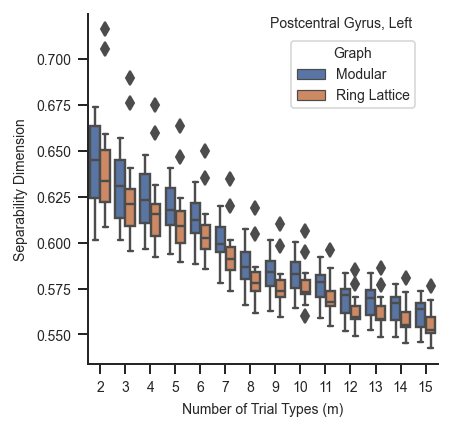

In [19]:
sns.set()
sns.set_style("ticks")
sns.set_context("paper", rc=plot_rc)
g = sns.catplot(x="m", y="dimensionality",
                hue="Graph", row="roi",
                data=(classification
                      .loc[lambda x: x.roi == 'postcentral-lh']
                      .rename(columns={'graph': 'Graph'})
                      .replace({'Lattice': 'Ring Lattice'})
                     ),
                kind="box",
                height=3, aspect=1,
                legend_out=False,
                sharey=False
               )
g.set(xlabel='Number of Trial Types (m)')
g.set(ylabel='Separability Dimension')
g.set(title=None)
transAxes = g.axes.flat[0].transAxes
g.axes.flat[0].text(0.52, 0.96, 'Postcentral Gyrus, Left', transform=transAxes)
plt.legend(loc=(0.58, 0.73), title='Graph')
g.savefig('images/dimensionality_postcentral.pdf')

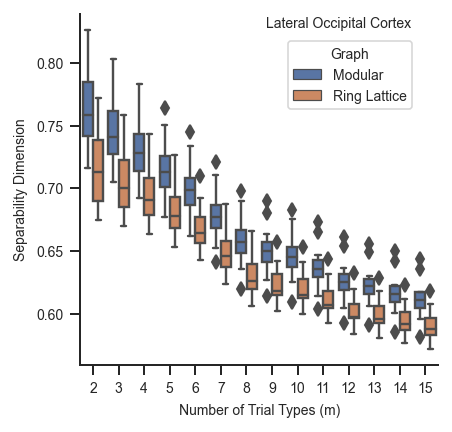

In [20]:
sns.set()
sns.set_style("ticks")
sns.set_context("paper", rc=plot_rc)
g = sns.catplot(x="m", y="dimensionality",
                hue="Graph", row="roi",
                data=(classification
                      .loc[lambda x: x.roi == 'loc-localized']
                      .rename(columns={'graph': 'Graph'})
                      .replace({'Lattice': 'Ring Lattice'})
                     ),
                kind='box',
                height=3, aspect=1,
                legend_out=False,
                sharey=False
               )
g.set(xlabel='Number of Trial Types (m)')
g.set(ylabel='Separability Dimension')
g.set(title=None)
transAxes = g.axes.flat[0].transAxes
g.axes.flat[0].text(0.52, 0.96, 'Lateral Occipital Cortex', transform=transAxes)
plt.legend(loc=(0.58, 0.73), title='Graph')
g.savefig('images/dimensionality_loc-localized.pdf')